## Data Loading

In [1]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
base_path = "/kaggle/input/medvqa/R-RAD"
closed_end_test_path = os.path.join(base_path, "/kaggle/input/medvqa/R-RAD/closed-end/testset.json")
closed_end_train_path = os.path.join(base_path, "/kaggle/input/medvqa/R-RAD/closed-end/trainset.json")
open_end_test_path = os.path.join(base_path, "/kaggle/input/medvqa/R-RAD/open-end/testset.json")
open_end_train_path = os.path.join(base_path, "/kaggle/input/medvqa/R-RAD/open-end/trainset.json")
images_dir = os.path.join(base_path, "/kaggle/input/medvqa/R-RAD/images")

def load_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

In [3]:
def display_sample_data(data, title, num_samples=1):
    print(f"\n=== {title} ===")
    if isinstance(data, dict):
        data_items = list(data.items())[:num_samples]
        for key, value in data_items:
            print(f"Sample {key}:")
            print(json.dumps(value, indent=2))
    else:
        for i in range(min(num_samples, len(data))):
            print(f"Sample {i}:")
            print(json.dumps(data[i], indent=2))

In [4]:
def visualize_samples(data, images_dir, title, num_samples=1):
    print(f"\n=== Visualizing {title} ===")
    if isinstance(data, dict):
        data_items = list(data.items())[:num_samples]
    else:
        data_items = [(str(i), data[i]) for i in range(min(num_samples, len(data)))]

    fig, axes = plt.subplots(1, num_samples, figsize=(12, 5))
    if num_samples == 1:
        axes = [axes]
    for idx, (key, sample) in enumerate(data_items):
        image_path = os.path.join(images_dir, sample["image"])
        if os.path.exists(image_path):
            img = Image.open(image_path)
            axes[idx].imshow(img)
            axes[idx].axis('off')
            answer = sample["choices"][sample["answer"]] if "choices" in sample else sample["answer"]
            axes[idx].set_title(f"Q: {sample['question']}\nA: {answer}", fontsize=10)
        else:
            print(f"Image not found: {image_path}")
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

In [5]:
closed_end_test = load_json(closed_end_test_path)
closed_end_train = load_json(closed_end_train_path)
open_end_test = load_json(open_end_test_path)
open_end_train = load_json(open_end_train_path)

In [6]:
display_sample_data(closed_end_test, "Closed-End Test Data")


=== Closed-End Test Data ===
Sample 11:
{
  "question": "Is there evidence of an aortic aneurysm?",
  "choices": [
    "yes",
    "no"
  ],
  "answer": 0,
  "image": "synpic42202.jpg",
  "question_type": "PRES",
  "answer_type": "CLOSED",
  "image_organ": "CHEST",
  "phrase_type": "freeform",
  "solution": "The presence of a widened mediastinum on the X-ray image may suggest an aortic aneurysm. This finding is typically detected as an abnormal widening or enlargement of the aorta, which is the main artery coming out of the heart. On the X-ray, the silhouette of the aorta may appear enlarged, curved or irregular, indicating the possible presence of an aneurysm. However, definitive diagnosis often requires further imaging such as a CT scan, MRI, or echocardiogram for confirmation."
}



=== Visualizing Closed-End Test Samples ===


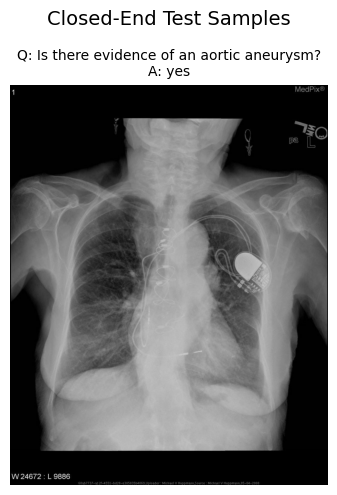

In [7]:
visualize_samples(closed_end_test, images_dir, "Closed-End Test Samples")

In [8]:
display_sample_data(closed_end_train, "Closed-End Train Data")


=== Closed-End Train Data ===
Sample 1:
{
  "question": "Are regions of the brain infarcted?",
  "choices": [
    "yes",
    "no"
  ],
  "answer": 0,
  "image": "synpic54610.jpg",
  "question_type": "PRES",
  "answer_type": "CLOSED",
  "image_organ": "HEAD",
  "phrase_type": "freeform",
  "solution": "The image provided is a Diffusion-Weighted Imaging (DWI) MRI scan of the brain, which is very sensitive to changes in water molecule movement. In an acute cerebral infarction (stroke), the water molecule movement within the brain tissue is restricted due to the lack of blood flow to that region. In DWI MRI scans, areas of acute infarction appear as bright signals, which indicates restricted diffusion. The provided image shows bright spots consistent with regions of restricted diffusion, usually indicative of recent infarction in those brain areas, thus confirming the presence of infarcted regions."
}



=== Visualizing Closed-End Train Samples ===


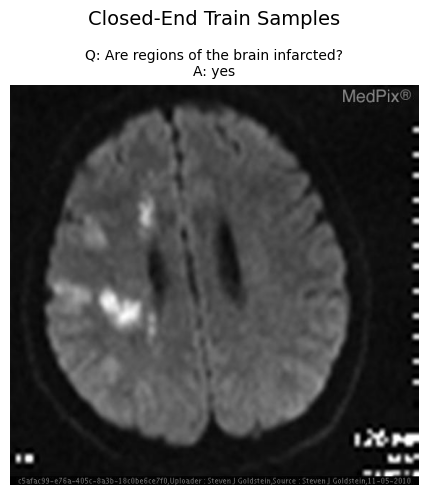

In [9]:
visualize_samples(closed_end_train, images_dir, "Closed-End Train Samples")

In [10]:
display_sample_data(open_end_test, "Open-End Test Data")


=== Open-End Test Data ===
Sample 20:
{
  "question": "How is the patient oriented?",
  "choices": [
    "Posterior-Anterior"
  ],
  "answer": 0,
  "image": "synpic29265.jpg",
  "question_type": "OTHER",
  "answer_type": "OPEN",
  "image_organ": "CHEST",
  "phrase_type": "freeform",
  "solution": "The orientation of the patient for this X-ray is determined based on the direction the X-ray beam has passed through the patient's body. In a Posterior-Anterior (PA) view, the X-ray enters the patient's back and exits through the chest towards the film or detector placed in front of the patient. This orientation is standard for chest X-rays as it provides an undistorted image of the heart and lungs. It also minimizes the magnification of the heart shadow, giving a more accurate representation of cardiac size and shape compared to an Anterior-Posterior (AP) view. The image provided is a standard chest X-ray, which is typically taken in a PA orientation as indicated by the clearer heart border


=== Visualizing Open-End Test Samples ===


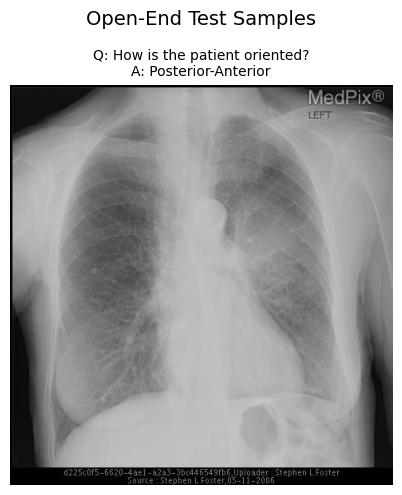

In [11]:
visualize_samples(open_end_test, images_dir, "Open-End Test Samples")

In [12]:
display_sample_data(open_end_train, "Open-End Train Data")


=== Open-End Train Data ===
Sample 4:
{
  "question": "What type of imaging does this not represent?",
  "choices": [
    "ultrasound"
  ],
  "answer": 0,
  "image": "synpic28602.jpg",
  "question_type": "MODALITY",
  "answer_type": "OPEN",
  "image_organ": "CHEST",
  "phrase_type": "freeform",
  "solution": "The image shows a grayscale picture of a human's chest with clear visualization of the rib cage and lungs, indicating it is a radiographic image, typically referred to as an X-ray. An X-ray image works by passing ionizing radiation through the body and capturing the varying absorption rates of different tissues on a detector or film. Bones, being very dense, absorb a lot of the radiation and therefore appear white or light on the image, while soft tissues absorb less and appear in shades of gray. On the other hand, ultrasound imaging uses high-frequency sound waves to produce images of structures within the body. It is commonly used for viewing soft tissues and is known for its u


=== Visualizing Open-End Train Samples ===


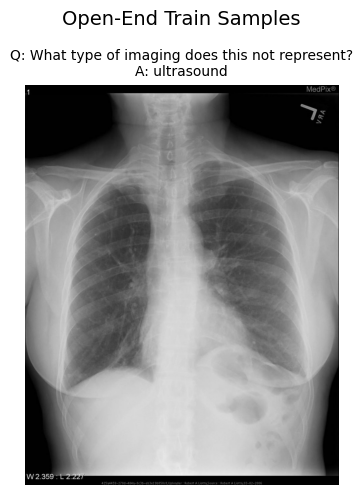

In [13]:
visualize_samples(open_end_train, images_dir, "Open-End Train Samples")

In [14]:
display_sample_data(closed_end_test, "Closed-End Test Data")


=== Closed-End Test Data ===
Sample 11:
{
  "question": "Is there evidence of an aortic aneurysm?",
  "choices": [
    "yes",
    "no"
  ],
  "answer": 0,
  "image": "synpic42202.jpg",
  "question_type": "PRES",
  "answer_type": "CLOSED",
  "image_organ": "CHEST",
  "phrase_type": "freeform",
  "solution": "The presence of a widened mediastinum on the X-ray image may suggest an aortic aneurysm. This finding is typically detected as an abnormal widening or enlargement of the aorta, which is the main artery coming out of the heart. On the X-ray, the silhouette of the aorta may appear enlarged, curved or irregular, indicating the possible presence of an aneurysm. However, definitive diagnosis often requires further imaging such as a CT scan, MRI, or echocardiogram for confirmation."
}


In [15]:
display_sample_data(closed_end_train, "Closed-End Train Data")


=== Closed-End Train Data ===
Sample 1:
{
  "question": "Are regions of the brain infarcted?",
  "choices": [
    "yes",
    "no"
  ],
  "answer": 0,
  "image": "synpic54610.jpg",
  "question_type": "PRES",
  "answer_type": "CLOSED",
  "image_organ": "HEAD",
  "phrase_type": "freeform",
  "solution": "The image provided is a Diffusion-Weighted Imaging (DWI) MRI scan of the brain, which is very sensitive to changes in water molecule movement. In an acute cerebral infarction (stroke), the water molecule movement within the brain tissue is restricted due to the lack of blood flow to that region. In DWI MRI scans, areas of acute infarction appear as bright signals, which indicates restricted diffusion. The provided image shows bright spots consistent with regions of restricted diffusion, usually indicative of recent infarction in those brain areas, thus confirming the presence of infarcted regions."
}


In [16]:
display_sample_data(open_end_test, "Open-End Test Data")


=== Open-End Test Data ===
Sample 20:
{
  "question": "How is the patient oriented?",
  "choices": [
    "Posterior-Anterior"
  ],
  "answer": 0,
  "image": "synpic29265.jpg",
  "question_type": "OTHER",
  "answer_type": "OPEN",
  "image_organ": "CHEST",
  "phrase_type": "freeform",
  "solution": "The orientation of the patient for this X-ray is determined based on the direction the X-ray beam has passed through the patient's body. In a Posterior-Anterior (PA) view, the X-ray enters the patient's back and exits through the chest towards the film or detector placed in front of the patient. This orientation is standard for chest X-rays as it provides an undistorted image of the heart and lungs. It also minimizes the magnification of the heart shadow, giving a more accurate representation of cardiac size and shape compared to an Anterior-Posterior (AP) view. The image provided is a standard chest X-ray, which is typically taken in a PA orientation as indicated by the clearer heart border

In [17]:
display_sample_data(open_end_train, "Open-End Train Data")


=== Open-End Train Data ===
Sample 4:
{
  "question": "What type of imaging does this not represent?",
  "choices": [
    "ultrasound"
  ],
  "answer": 0,
  "image": "synpic28602.jpg",
  "question_type": "MODALITY",
  "answer_type": "OPEN",
  "image_organ": "CHEST",
  "phrase_type": "freeform",
  "solution": "The image shows a grayscale picture of a human's chest with clear visualization of the rib cage and lungs, indicating it is a radiographic image, typically referred to as an X-ray. An X-ray image works by passing ionizing radiation through the body and capturing the varying absorption rates of different tissues on a detector or film. Bones, being very dense, absorb a lot of the radiation and therefore appear white or light on the image, while soft tissues absorb less and appear in shades of gray. On the other hand, ultrasound imaging uses high-frequency sound waves to produce images of structures within the body. It is commonly used for viewing soft tissues and is known for its u

In [18]:
def json_to_df(json_data, split_name):
    if isinstance(json_data, dict):
        data_list = [dict(item[1], id=item[0]) for item in json_data.items()]
    else:
        data_list = json_data
    df = pd.DataFrame(data_list)
    df['split'] = split_name
    return df

In [19]:
df_closed_test = json_to_df(closed_end_test, "test")
df_closed_train = json_to_df(closed_end_train, "train")
df_open_test = json_to_df(open_end_test, "test")
df_open_train = json_to_df(open_end_train, "train")

In [20]:
df_train = pd.concat([df_closed_train, df_open_train], ignore_index=True)
print("\n=== Training DataFrame Info (Closed + Open) ===")
df_train.info()


=== Training DataFrame Info (Closed + Open) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3064 entries, 0 to 3063
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   question       3064 non-null   object
 1   choices        3064 non-null   object
 2   answer         3064 non-null   int64 
 3   image          3064 non-null   object
 4   question_type  3064 non-null   object
 5   answer_type    3064 non-null   object
 6   image_organ    3064 non-null   object
 7   phrase_type    3064 non-null   object
 8   solution       3064 non-null   object
 9   id             3064 non-null   object
 10  split          3064 non-null   object
dtypes: int64(1), object(10)
memory usage: 263.4+ KB


In [21]:
print("\nSample of Training DataFrame:")
df_train.tail()


Sample of Training DataFrame:


,question,choices,answer,image,question_type,answer_type,image_organ,phrase_type,solution,id,split
3059,How many ribs are there?,[12],0,synpic53228.jpg,COUNT,OPEN,CHEST,frame,"Humans typically have 12 pairs of ribs, making...",3495,train
3060,How many ribs are present in vertical order on...,[12],0,synpic53228.jpg,COUNT,OPEN,CHEST,para,The chest radiograph (commonly known as an X-r...,3496,train
3061,How many ribs are there?,[12],0,synpic53228.jpg,COUNT,OPEN,CHEST,frame,The human rib cage consists of 12 pairs of rib...,3497,train
3062,What is the hypodensity located inside the ver...,[Nucleus Pulposus],0,synpic31232.jpg,PRES,OPEN,ABD,freeform,The nucleus pulposus is the inner core of the ...,3514,train
3063,What is the hypo-dense area seen in the verteb...,[Nucleus Pulposus],0,synpic31232.jpg,PRES,OPEN,ABD,para,"In the provided CT scan image, different tissu...",3515,train


In [22]:
open_closed_counts = df_train["answer_type"].value_counts()
print("\nCounts of OPEN and CLOSED questions in df_train:")
print(open_closed_counts)


Counts of OPEN and CLOSED questions in df_train:
answer_type
CLOSED    1823
OPEN      1241
Name: count, dtype: int64


In [23]:
df_test = pd.concat([df_closed_test, df_open_test], ignore_index=True)
print("\n=== Test DataFrame Info (Closed + Open) ===")
df_test.info()


=== Test DataFrame Info (Closed + Open) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   question       451 non-null    object
 1   choices        451 non-null    object
 2   answer         451 non-null    int64 
 3   image          451 non-null    object
 4   question_type  451 non-null    object
 5   answer_type    451 non-null    object
 6   image_organ    451 non-null    object
 7   phrase_type    451 non-null    object
 8   solution       451 non-null    object
 9   id             451 non-null    object
 10  split          451 non-null    object
dtypes: int64(1), object(10)
memory usage: 38.9+ KB


In [24]:
print("\nSample of Test DataFrame:")
df_test.head()


Sample of Test DataFrame:


,question,choices,answer,image,question_type,answer_type,image_organ,phrase_type,solution,id,split
0,Is there evidence of an aortic aneurysm?,"[yes, no]",0,synpic42202.jpg,PRES,CLOSED,CHEST,freeform,The presence of a widened mediastinum on the X...,11,test
1,Is there airspace consolidation on the left side?,"[yes, no]",0,synpic29265.jpg,PRES,CLOSED,CHEST,freeform,"On the provided chest X-ray, there is evidence...",13,test
2,Is this an axial plane?,"[yes, no]",0,synpic54610.jpg,PLANE,CLOSED,HEAD,freeform,"An axial plane, also known as a transverse pla...",14,test
3,Is there vascular pathology in this image?,"[yes, no]",0,synpic54610.jpg,ABN,CLOSED,HEAD,freeform,The image provided is a diffusion-weighted MRI...,22,test
4,Is there cardiomyopathy?,"[yes, no]",0,synpic42202.jpg,SIZE,CLOSED,CHEST,freeform,The image provided is a chest X-ray showing an...,24,test


In [25]:
open_closed_counts = df_test["answer_type"].value_counts()
print("\nCounts of OPEN and CLOSED questions in df_test:")
print(open_closed_counts)


Counts of OPEN and CLOSED questions in df_test:
answer_type
CLOSED    272
OPEN      179
Name: count, dtype: int64


## Data Pre-Processing (Training Data)

In [26]:
len(df_train)

3064

In [27]:
from PIL import Image
import pandas as pd

def img_size(row, images_dir):
    image_path = os.path.join(images_dir, row["image"])
    try:
        image = Image.open(image_path)
        return {"width": image.size[0], "height": image.size[1]}
    except FileNotFoundError:
        print(f"Image not found: {image_path}")
        return {"width": None, "height": None}
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return {"width": None, "height": None}

images_dir = "/kaggle/input/medvqa/R-RAD/images"

image_sizes = df_train.apply(lambda row: img_size(row, images_dir), axis=1)

df_sizes = pd.DataFrame(image_sizes.tolist())

print(df_sizes.value_counts())

width  height
512    512       361
1024   842       120
       1310       64
960    720        47
1024   1286       45
                ... 
762    630         2
360    437         2
320    353         2
634    867         1
766    857         1
Name: count, Length: 218, dtype: int64


In [28]:
print("Min Width:", df_sizes["width"].min(), "Max Width:", df_sizes["width"].max())
print("Min Height:", df_sizes["height"].min(), "Max Height:", df_sizes["height"].max())

Min Width: 256 Max Width: 2321
Min Height: 256 Max Height: 1500


In [29]:
from collections import Counter
from PIL import Image
import os

images_dir = "/kaggle/input/medvqa/R-RAD/images"

def get_image_mode(row, images_dir):
    image_path = os.path.join(images_dir, row["image"])
    try:
        img = Image.open(image_path)
        return img.mode
    except FileNotFoundError:
        print(f"Image not found: {image_path}")
        return None
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

modes = Counter([mode for mode in df_train.apply(lambda row: get_image_mode(row, images_dir), axis=1) if mode is not None])
print("Image Modes Count:", modes)

Image Modes Count: Counter({'RGB': 3064})


In [30]:
def preprocess_image(row, images_dir, target_size=(512, 512)):
    image_path = os.path.join(images_dir, row["image"])
    try:
        image = Image.open(image_path)
        image = image.resize(target_size, Image.LANCZOS)
        image = image.convert("RGB")
        return image
    except FileNotFoundError:
        print(f"Image not found: {image_path}")
        return None
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

In [31]:
df_train["image_processed"] = df_train.apply(lambda row: preprocess_image(row, images_dir), axis=1)
print("Number of failed preprocessings:", df_train["image_processed"].isna().sum())

Number of failed preprocessings: 0


In [32]:
print("\nSample of df_train after preprocessing:")
df_train.tail()


Sample of df_train after preprocessing:


,question,choices,answer,image,question_type,answer_type,image_organ,phrase_type,solution,id,split,image_processed
3059,How many ribs are there?,[12],0,synpic53228.jpg,COUNT,OPEN,CHEST,frame,"Humans typically have 12 pairs of ribs, making...",3495,train,<PIL.Image.Image image mode=RGB size=512x512 a...
3060,How many ribs are present in vertical order on...,[12],0,synpic53228.jpg,COUNT,OPEN,CHEST,para,The chest radiograph (commonly known as an X-r...,3496,train,<PIL.Image.Image image mode=RGB size=512x512 a...
3061,How many ribs are there?,[12],0,synpic53228.jpg,COUNT,OPEN,CHEST,frame,The human rib cage consists of 12 pairs of rib...,3497,train,<PIL.Image.Image image mode=RGB size=512x512 a...
3062,What is the hypodensity located inside the ver...,[Nucleus Pulposus],0,synpic31232.jpg,PRES,OPEN,ABD,freeform,The nucleus pulposus is the inner core of the ...,3514,train,<PIL.Image.Image image mode=RGB size=512x512 a...
3063,What is the hypo-dense area seen in the verteb...,[Nucleus Pulposus],0,synpic31232.jpg,PRES,OPEN,ABD,para,"In the provided CT scan image, different tissu...",3515,train,<PIL.Image.Image image mode=RGB size=512x512 a...


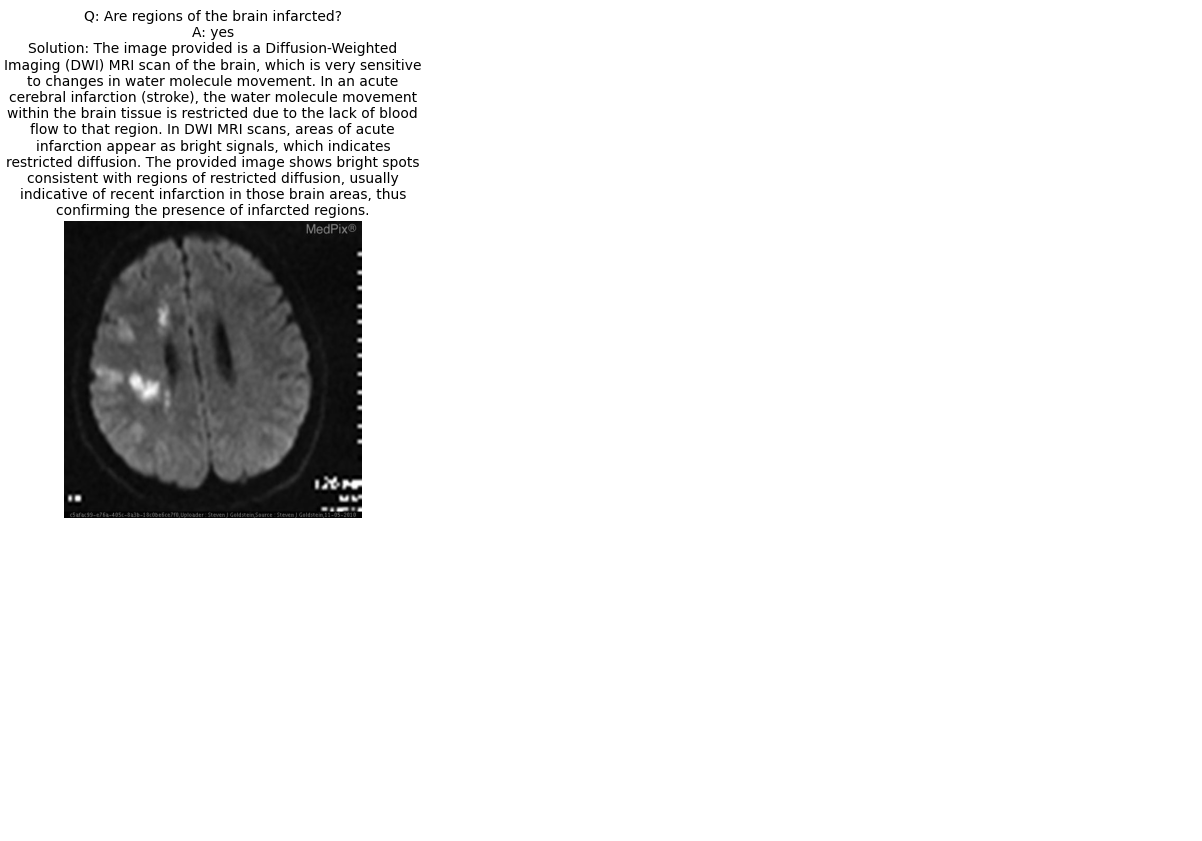

In [33]:
import matplotlib.pyplot as plt

def visualize_df(df, num_images=1):
    valid_df = df.dropna(subset=["image_processed"])
    if len(valid_df) < num_images:
        num_images = len(valid_df)
        print(f"Reduced num_images to {num_images} due to available valid images.")

    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes = axes.flatten()

    for i in range(num_images):
        row = valid_df.iloc[i]
        image = row["image_processed"]
        question = row["question"]
        answer = row["choices"][row["answer"]] if row["answer_type"] == "CLOSED" else row["choices"][0]
        solution = row.get("solution", "No solution provided")

        axes[i].imshow(image)
        axes[i].axis("off")
        axes[i].set_title(f"Q: {question}\nA: {answer}\nSolution: {solution}", fontsize=10, wrap=True)

    # Hide any unused subplots
    for j in range(num_images, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()
visualize_df(df_train, num_images=1)

## Data Pre-Processing (Test Data)

In [34]:
len(df_test)

451

In [35]:
df_test.head()

,question,choices,answer,image,question_type,answer_type,image_organ,phrase_type,solution,id,split
0,Is there evidence of an aortic aneurysm?,"[yes, no]",0,synpic42202.jpg,PRES,CLOSED,CHEST,freeform,The presence of a widened mediastinum on the X...,11,test
1,Is there airspace consolidation on the left side?,"[yes, no]",0,synpic29265.jpg,PRES,CLOSED,CHEST,freeform,"On the provided chest X-ray, there is evidence...",13,test
2,Is this an axial plane?,"[yes, no]",0,synpic54610.jpg,PLANE,CLOSED,HEAD,freeform,"An axial plane, also known as a transverse pla...",14,test
3,Is there vascular pathology in this image?,"[yes, no]",0,synpic54610.jpg,ABN,CLOSED,HEAD,freeform,The image provided is a diffusion-weighted MRI...,22,test
4,Is there cardiomyopathy?,"[yes, no]",0,synpic42202.jpg,SIZE,CLOSED,CHEST,freeform,The image provided is a chest X-ray showing an...,24,test


In [36]:
from PIL import Image
import pandas as pd

def img_size(row, images_dir):
    image_path = os.path.join(images_dir, row["image"])
    try:
        image = Image.open(image_path)
        return {"width": image.size[0], "height": image.size[1]}
    except FileNotFoundError:
        print(f"Image not found: {image_path}")
        return {"width": None, "height": None}
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return {"width": None, "height": None}

images_dir = "/kaggle/input/medvqa/R-RAD/images"

image_sizes = df_test.apply(lambda row: img_size(row, images_dir), axis=1)

df_sizes = pd.DataFrame(image_sizes.tolist())

print(df_sizes.value_counts())

width  height
512    512       62
1024   842       19
910    1138      10
1024   1245      10
       654        8
                 ..
360    437        1
396    432        1
1024   1170       1
       1175       1
296    336        1
Name: count, Length: 141, dtype: int64


In [37]:
print("Min Width:", df_sizes["width"].min(), "Max Width:", df_sizes["width"].max())
print("Min Height:", df_sizes["height"].min(), "Max Height:", df_sizes["height"].max())

Min Width: 256 Max Width: 1024
Min Height: 256 Max Height: 1314


In [38]:
def preprocess_image(row, images_dir, target_size=(512, 512)):
    image_path = os.path.join(images_dir, row["image"])
    try:
        image = Image.open(image_path)
        image = image.resize(target_size, Image.LANCZOS)
        image = image.convert("RGB")
        return image
    except FileNotFoundError:
        print(f"Image not found: {image_path}")
        return None
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

In [39]:
df_test["image_processed"] = df_test.apply(lambda row: preprocess_image(row, images_dir), axis=1)

In [40]:
print("Number of failed preprocessings:", df_test["image_processed"].isna().sum())

Number of failed preprocessings: 0


In [41]:
df_test.head()

,question,choices,answer,image,question_type,answer_type,image_organ,phrase_type,solution,id,split,image_processed
0,Is there evidence of an aortic aneurysm?,"[yes, no]",0,synpic42202.jpg,PRES,CLOSED,CHEST,freeform,The presence of a widened mediastinum on the X...,11,test,<PIL.Image.Image image mode=RGB size=512x512 a...
1,Is there airspace consolidation on the left side?,"[yes, no]",0,synpic29265.jpg,PRES,CLOSED,CHEST,freeform,"On the provided chest X-ray, there is evidence...",13,test,<PIL.Image.Image image mode=RGB size=512x512 a...
2,Is this an axial plane?,"[yes, no]",0,synpic54610.jpg,PLANE,CLOSED,HEAD,freeform,"An axial plane, also known as a transverse pla...",14,test,<PIL.Image.Image image mode=RGB size=512x512 a...
3,Is there vascular pathology in this image?,"[yes, no]",0,synpic54610.jpg,ABN,CLOSED,HEAD,freeform,The image provided is a diffusion-weighted MRI...,22,test,<PIL.Image.Image image mode=RGB size=512x512 a...
4,Is there cardiomyopathy?,"[yes, no]",0,synpic42202.jpg,SIZE,CLOSED,CHEST,freeform,The image provided is a chest X-ray showing an...,24,test,<PIL.Image.Image image mode=RGB size=512x512 a...


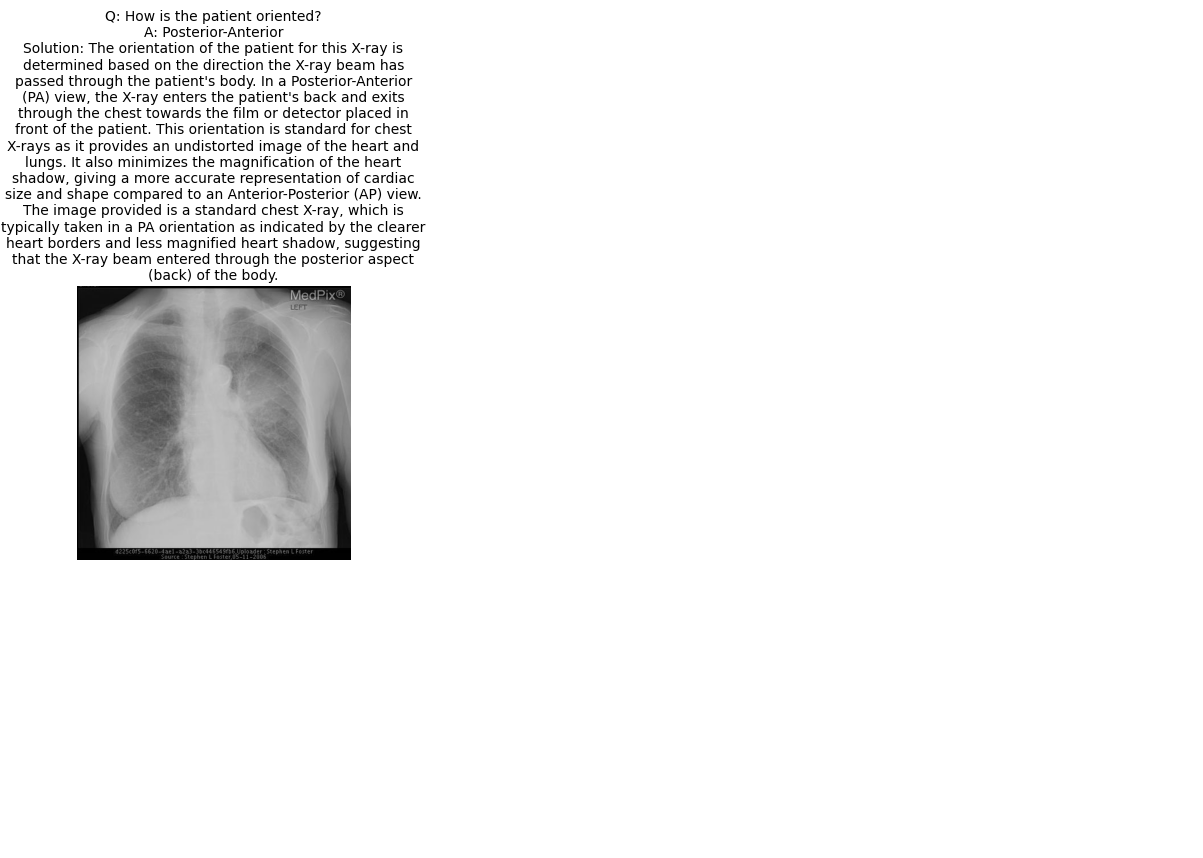

In [42]:
def visualize_df(df, num_images=1):
    # Keep only rows that have valid images AND are open-ended
    valid_df = df.dropna(subset=["image_processed"])
    valid_df = valid_df[valid_df["answer_type"] == "OPEN"]

    if len(valid_df) < num_images:
        num_images = len(valid_df)
        print(f"Reduced num_images to {num_images} due to available valid OPEN questions.")

    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes = axes.flatten()

    for i in range(num_images):
        row = valid_df.iloc[i]
        image = row["image_processed"]
        question = row["question"]
        answer = row["choices"][row["answer"]]
        solution = row.get("solution", "No solution provided")

        axes[i].imshow(image)
        axes[i].axis("off")
        axes[i].set_title(f"Q: {question}\nA: {answer}\nSolution: {solution}", fontsize=10, wrap=True)

    for j in range(num_images, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()
visualize_df(df_test, num_images=1)

## Knowledge Graph

In [43]:
%pip install neo4j langchain langchain_openai langchain-community python-dotenv --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.3/312.3 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.9/433.9 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.0/647.0 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import dotenv
dotenv.load_dotenv('.env', override=True)

import os
from langchain_community.graphs import Neo4jGraph
os.environ.update({
    "NEO4J_URI": "neo4j+s://31d946a9.databases.neo4j.io",
    "NEO4J_USERNAME": "neo4j",
    "NEO4J_PASSWORD": "put your neo4j password here",
    "OPENAI_API_KEY": "put your openai api key here",
})
graph = Neo4jGraph(
    url=os.environ['NEO4J_URI'],
    username=os.environ['NEO4J_USERNAME'],
    password=os.environ['NEO4J_PASSWORD'],
)

/tmp/ipykernel_31/74917996.py:12: LangChainDeprecationWarning: The class `Neo4jGraph` was deprecated in LangChain 0.3.8 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-neo4j package and should be used instead. To use it run `pip install -U :class:`~langchain-neo4j` and import as `from :class:`~langchain_neo4j import Neo4jGraph``.
  graph = Neo4jGraph(


In [45]:
import os
import json
import pandas as pd
from PIL import Image
from tqdm import tqdm
import traceback
import uuid

def create_constraints(neo4j_graph):
    """Creates constraints in Neo4j for the knowledge graph schema."""
    if neo4j_graph is None:
        print("Neo4j graph not initialized, skipping constraint creation.")
        return

    constraints_queries = [
        "CREATE CONSTRAINT IF NOT EXISTS FOR (img:Image) REQUIRE img.image_id IS UNIQUE",
        "CREATE CONSTRAINT IF NOT EXISTS FOR (q:Question) REQUIRE q.text IS UNIQUE",
        "CREATE CONSTRAINT IF NOT EXISTS FOR (sol:Solution) REQUIRE sol.text IS UNIQUE",
        "CREATE CONSTRAINT IF NOT EXISTS FOR (org:Organ) REQUIRE org.name IS UNIQUE",
        "CREATE CONSTRAINT IF NOT EXISTS FOR (cat:Category) REQUIRE cat.name IS UNIQUE",
        "CREATE CONSTRAINT IF NOT EXISTS FOR (rat:Rationale) REQUIRE rat.text IS UNIQUE"
    ]
    print("Creating/Verifying Neo4j constraints...")

    created_count = 0
    skipped_count = 0
    error_count = 0
    for query in constraints_queries:
        try:
            neo4j_graph.query(query)
            print(f"  Executed: {query}")
            created_count += 1
        except Exception as e:
            if "already exists" in str(e).lower():
                print(f"  Skipped (already exists): {query}")
                skipped_count += 1
            else:
                print(f"  Error creating constraint: {e}. Query: {query}")
                error_count += 1
    print(f"Constraint setup complete. Executed/Verified: {created_count}, Skipped: {skipped_count}, Errors: {error_count}")

def _load_batch(records, neo4j_graph):
    """Loads a batch of records into Neo4j using the knowledge graph schema."""
    if neo4j_graph is None:
        print("Neo4j graph not initialized, skipping batch load.")
        return 0

    cypher_query = """
    UNWIND $records AS record
    MERGE (img:Image {image_id: record.image_id})
      ON CREATE SET img.filename = record.filename,
                    img.split = record.split,
                    img.organ = record.image_organ
    MERGE (q:Question {text: record.question})
      ON CREATE SET q.answer_type = record.answer_type
    MERGE (a:Answer {text: record.answer})
    MERGE (sol:Solution {text: record.solution})
    MERGE (org:Organ {name: record.image_organ})
    MERGE (cat:Category {name: record.answer_type})
    MERGE (img)-[:DEPICTS]->(org)
    MERGE (img)-[:HAS_QUESTION]->(q)
    MERGE (img)-[:HAS_ANSWER]->(a)
    MERGE (q)-[:BELONGS_TO]->(cat)
    MERGE (q)-[:HAS_ANSWER]->(a)
    MERGE (q)-[:REFERS_TO]->(img)
    MERGE (q)-[:HAS_SOLUTION]->(sol)
    """
    parameters = {"records": records}
    try:
        neo4j_graph.query(cypher_query, parameters)
        return len(records)
    except Exception as e:
        print(f"Error loading batch to Neo4j: {e}")
        if records:
            print(f"First record in failing batch: {records[0]}")
        traceback.print_exc()
        return 0

def count_question_types(neo4j_graph):
    """Counts the number of open and closed-ended questions in the knowledge graph."""
    if neo4j_graph is None:
        print("Neo4j graph not initialized, cannot count question types.")
        return

    query = """
    MATCH (q:Question)
    RETURN q.answer_type AS answer_type, COUNT(q) AS count
    """
    try:
        result = neo4j_graph.query(query)
        open_count = 0
        closed_count = 0
        for record in result:
            if record['answer_type'] == 'OPEN':
                open_count = record['count']
            elif record['answer_type'] == 'CLOSED':
                closed_count = record['count']
        print(f"Number of Open-Ended Questions: {open_count}")
        print(f"Number of Closed-Ended Questions: {closed_count}")
    except Exception as e:
        print(f"Error counting question types: {e}")

def load_data_to_kg(dataset_records, split_name, neo4j_graph, batch_size=100):
    """Loads dataset records into Neo4j knowledge graph."""
    if neo4j_graph is None:
        print(f"Neo4j graph not initialized, skipping data load for {split_name} split.")
        return
    if not dataset_records:
        print(f"No records found for {split_name} split. Skipping KG load.")
        return

    print(f"\nLoading {len(dataset_records)} records from {split_name} split into Neo4j...")
    total_loaded = 0
    batch = []
    for i, example in enumerate(tqdm(dataset_records, desc=f"Loading {split_name} data")):
        image_id = example.get('image_id', f"{split_name}_{uuid.uuid4()}")
        filename = example.get('image', 'unknown_image.jpg')
        question = example.get('question', 'Unknown question')
        choices = example.get('choices', [])
        answer = str(example.get('answer', 'Unknown answer'))
        answer_type = example.get('answer_type', 'unknown')
        image_organ = example.get('image_organ', 'unknown_organ')
        solution = example.get('solution', 'Unknown solution')

        record = {
            "image_id": image_id,
            "filename": filename,
            "question": str(question),
            "choices": choices,
            "answer": answer,
            "answer_type": answer_type,
            "image_organ": image_organ,
            "solution": str(solution),
            "split": split_name
        }
        batch.append(record)

        if len(batch) >= batch_size:
            loaded_count = _load_batch(batch, neo4j_graph)
            total_loaded += loaded_count
            batch = []

    if batch:
        loaded_count = _load_batch(batch, neo4j_graph)
        total_loaded += loaded_count

    print(f"Finished loading {split_name} split. Loaded: {total_loaded} records.")

required_columns = ['question', 'choices', 'answer', 'answer_type', 'image_organ', 'solution', 'image_processed']
df_train = df_train[required_columns]

# Convert training DataFrame to records for KG loading
train_records = df_train.to_dict(orient="records")

# Load data into KG (only training data by default)
if 'graph' in globals() and graph is not None:
    print("\nClearing existing graph data to avoid conflicts...")
    try:
        graph.query("MATCH (n) DETACH DELETE n")
        print("Graph data cleared.")
    except Exception as e:
        print(f"Warning: Failed to clear graph data: {e}")

    print("\nLoading training data into Knowledge Graph...")
    create_constraints(graph)
    load_data_to_kg(train_records, "train", graph)
    count_question_types(graph)

    # Refresh schema after loading
    print("\nRefreshing KG schema...")
    try:
        graph.refresh_schema()
        print("\nCurrent KG schema:")
        print(graph.schema)
    except Exception as e:
        print(f"Error refreshing schema: {e}")
else:
    print("\nSkipping KG data loading (Neo4j graph unavailable).")


Clearing existing graph data to avoid conflicts...

Loading training data into Knowledge Graph...
Creating/Verifying Neo4j constraints...
  Executed: CREATE CONSTRAINT IF NOT EXISTS FOR (img:Image) REQUIRE img.image_id IS UNIQUE
  Executed: CREATE CONSTRAINT IF NOT EXISTS FOR (q:Question) REQUIRE q.text IS UNIQUE
  Executed: CREATE CONSTRAINT IF NOT EXISTS FOR (sol:Solution) REQUIRE sol.text IS UNIQUE
  Executed: CREATE CONSTRAINT IF NOT EXISTS FOR (org:Organ) REQUIRE org.name IS UNIQUE
  Executed: CREATE CONSTRAINT IF NOT EXISTS FOR (cat:Category) REQUIRE cat.name IS UNIQUE
  Executed: CREATE CONSTRAINT IF NOT EXISTS FOR (rat:Rationale) REQUIRE rat.text IS UNIQUE
Constraint setup complete. Executed/Verified: 6, Skipped: 0, Errors: 0

Loading 3064 records from train split into Neo4j...


Loading train data: 100%|██████████| 3064/3064 [00:20<00:00, 150.93it/s]


Finished loading train split. Loaded: 3064 records.
Number of Open-Ended Questions: 879
Number of Closed-Ended Questions: 1320

Refreshing KG schema...

Current KG schema:
Node properties:
Image {image_id: STRING, filename: STRING, organ: STRING, split: STRING, embedding: LIST}
Question {text: STRING, answer_type: STRING, embedding: LIST}
Organ {name: STRING}
Category {name: STRING}
Answer {text: STRING}
Solution {text: STRING}
Relationship properties:

The relationships:
(:Image)-[:DEPICTS]->(:Organ)
(:Image)-[:HAS_ANSWER]->(:Answer)
(:Image)-[:HAS_QUESTION]->(:Question)
(:Question)-[:BELONGS_TO]->(:Category)
(:Question)-[:HAS_ANSWER]->(:Answer)
(:Question)-[:REFERS_TO]->(:Image)
(:Question)-[:HAS_SOLUTION]->(:Solution)


Neo4j connection verified. Total nodes in database: 23854
Fetched 20 relationships from Neo4j.
Graph constructed with 21 nodes and 20 edges.
Visualization saved as kg_visualization.png (check Kaggle output files).


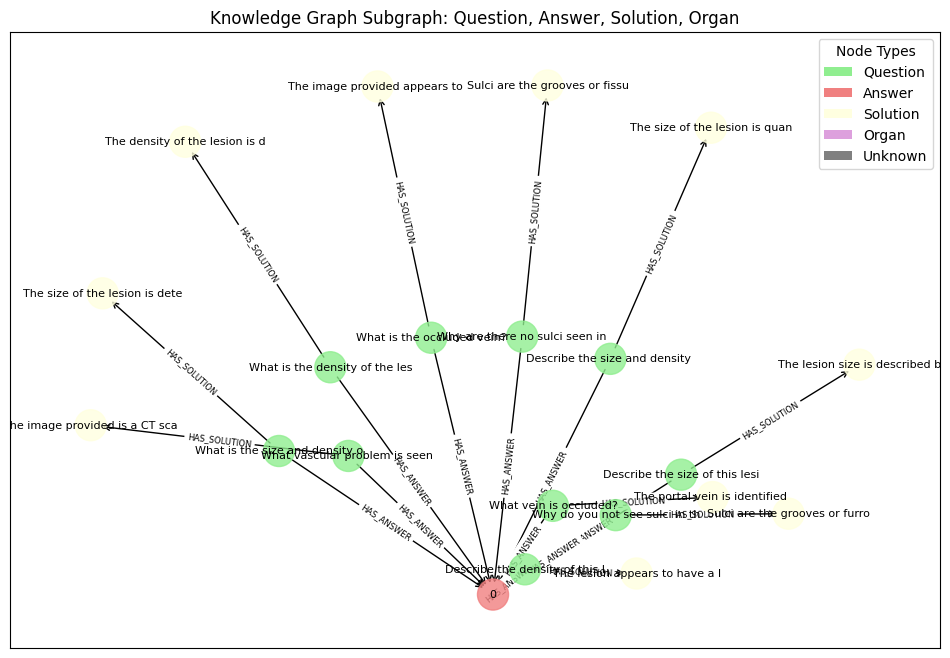

Visualization displayed inline.


In [46]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from langchain_community.graphs import Neo4jGraph

# Ensure matplotlib inline for Kaggle
%matplotlib inline

def visualize_kg(neo4j_graph, max_nodes=10, output_file="kg_visualization.png"):
    """Visualizes a subgraph of the Neo4j knowledge graph in Kaggle, limited to Question, Answer, Solution, and Organ nodes."""
    if neo4j_graph is None:
        print("Neo4j graph not initialized, cannot visualize.")
        return

    # Verify Neo4j connection
    try:
        result = neo4j_graph.query("MATCH (n) RETURN count(n) AS count")
        print(f"Neo4j connection verified. Total nodes in database: {result[0]['count']}")
    except Exception as e:
        print(f"Neo4j connection failed: {e}")
        return

    # Query to fetch a sample of nodes and relationships for Question, Answer, Solution, and Organ
    query = """
    MATCH (n)-[r]->(m)
    WHERE labels(n) IN [['Question'], ['Answer'], ['Solution'], ['Organ']]
    AND labels(m) IN [['Question'], ['Answer'], ['Solution'], ['Organ']]
    RETURN labels(n) AS source_labels, n AS source, type(r) AS rel_type, labels(m) AS target_labels, m AS target
    LIMIT $limit
    """
    try:
        # Fetch data with a limit
        result = neo4j_graph.query(query, {"limit": max_nodes * 2})
        print(f"Fetched {len(result)} relationships from Neo4j.")

        if not result:
            print("No data returned from Neo4j query. Check database content or query.")
            return

        # Initialize networkx directed graph
        G = nx.DiGraph()

        # Process nodes and relationships
        for record in result:
            # Extract source node
            source = record['source']
            source_labels = record['source_labels']  # List of labels
            source_label = source_labels[0] if source_labels else 'Unknown'  # Primary label
            source_id = source.get('text', str(source)) if source_label in ['Question', 'Answer', 'Solution'] else \
                        source.get('name', str(source)) if source_label == 'Organ' else str(source)
            source_id = str(source_id)[:30]  # Truncate for readability

            # Extract target node
            target = record['target']
            target_labels = record['target_labels']
            target_label = target_labels[0] if target_labels else 'Unknown'
            target_id = target.get('text', str(target)) if target_label in ['Question', 'Answer', 'Solution'] else \
                        target.get('name', str(target)) if target_label == 'Organ' else str(target)
            target_id = str(target_id)[:30]  # Truncate for readability

            # Extract relationship type
            rel_type = record['rel_type']

            # Add nodes with label attribute
            G.add_node(source_id, label=source_label)
            G.add_node(target_id, label=target_label)

            # Add edge
            G.add_edge(source_id, target_id, relationship=rel_type)

        if not G.nodes:
            print("No nodes added to the graph. Check query results or data format.")
            return

        print(f"Graph constructed with {len(G.nodes)} nodes and {len(G.edges)} edges.")

        # Define node colors based on label
        node_colors = {
            'Question': 'lightgreen',
            'Answer': 'lightcoral',
            'Solution': 'lightyellow',
            'Organ': 'plum',
            'Unknown': 'grey'
        }

        # Get node colors for visualization
        colors = [node_colors.get(G.nodes[node]['label'], 'grey') for node in G.nodes]

        # Set up the plot
        plt.figure(figsize=(12, 8))
        pos = nx.spring_layout(G, k=0.5, iterations=50)  # Layout for visualization

        # Draw nodes
        nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=500, alpha=0.8)

        # Draw edges
        nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=10)

        # Draw node labels
        nx.draw_networkx_labels(G, pos, font_size=8)

        # Draw edge labels
        edge_labels = {(u, v): d['relationship'] for u, v, d in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

        # Add a legend
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor=color, label=label) for label, color in node_colors.items()]
        plt.legend(handles=legend_elements, loc='upper right', title='Node Types')

        # Set title
        plt.title("Knowledge Graph Subgraph: Question, Answer, Solution, Organ")

        # Save as a fallback in Kaggle
        plt.savefig(output_file)
        print(f"Visualization saved as {output_file} (check Kaggle output files).")

        # Display inline
        plt.show()
        print("Visualization displayed inline.")

    except Exception as e:
        print(f"Error visualizing knowledge graph: {e}")
        traceback.print_exc()

# Call the function to visualize the graph
try:
    visualize_kg(graph, max_nodes=10)
except NameError:
    print("Error: 'graph' object not defined. Ensure Neo4jGraph is initialized.")

## Embedding Model

In [47]:
!pip install faiss-cpu --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 58.9 MB/s eta 0:00:00:00:0100:01


In [48]:
import os
import dotenv
import pandas as pd
import torch
from transformers import CLIPProcessor, CLIPModel
import numpy as np
import faiss
from tqdm import tqdm
from PIL import Image
import io

2025-04-21 17:35:54.174948: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745256954.343151      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745256954.393470      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [49]:
model_name = "openai/clip-vit-large-patch14"
processor = CLIPProcessor.from_pretrained(model_name)
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CLIPModel.from_pretrained(model_name).to(device)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

In [50]:
def get_image_embedding(image_data):
    """
    Extracts CLIP image embedding using preprocessed PIL Image from DataFrame.
    """
    if isinstance(image_data, Image.Image):
        image = image_data
    elif isinstance(image_data, str): 
        image = Image.open(image_data).convert("RGB")
    else:
        raise ValueError(f"Unsupported image data type: {type(image_data)}")

    inputs = processor(images=image, return_tensors="pt").to(device)
    with torch.no_grad():
        image_embedding = model.get_image_features(**inputs)
    return image_embedding.cpu().numpy().flatten()

In [51]:
def get_text_embedding(text):
    inputs = processor(text=[text], return_tensors="pt").to(device)
    with torch.no_grad():
        return model.get_text_features(**inputs).cpu().numpy().flatten()

In [52]:
train_image_embeddings = []
train_question_embeddings = []
train_metadata = []

In [53]:
for _, row in tqdm(df_train.iterrows(), total=len(df_train), desc="Processing Train Embeddings"):
    if row["image_processed"] is not None:
        image_emb = get_image_embedding(row["image_processed"])
        question_emb = get_text_embedding(row["question"])
        answer_text = row['choices'][row['answer']] if 'choices' in row else row['answer']
        train_image_embeddings.append(image_emb)
        train_question_embeddings.append(question_emb)
        train_metadata.append({
            "image_id": f"r-rad_train_{_}",
            "question": row["question"],
            "answer": answer_text,
            "solution": row.get("solution", "No rationale provided"),
            "image_name": row["image_processed"]
        })

train_image_embeddings = np.array(train_image_embeddings)

train_question_embeddings = np.array(train_question_embeddings)

Processing Train Embeddings: 100%|██████████| 3064/3064 [02:44<00:00, 18.64it/s]


In [54]:
index_image = faiss.IndexFlatL2(train_image_embeddings.shape[1])
index_image.add(train_image_embeddings)
faiss.write_index(index_image, "train_image_index.faiss")

index_question = faiss.IndexFlatL2(train_question_embeddings.shape[1])
index_question.add(train_question_embeddings)
faiss.write_index(index_question, "train_question_index.faiss")

print("FAISS indexes created.")

FAISS indexes created.


In [55]:
# checking that the imgs and text are embedded correctly
print("Train Image Embeddings Shape:", np.array(train_image_embeddings).shape)
print("Train Text Embeddings Shape:", np.array(train_question_embeddings).shape)

Train Image Embeddings Shape: (3064, 768)
Train Text Embeddings Shape: (3064, 768)


In [56]:
test_image_embeddings = []
test_question_embeddings = []
test_metadata = []

In [57]:
for _, row in tqdm(df_test.iterrows(), total=len(df_test), desc="Processing Test Embeddings"):
    if row["image_processed"] is not None:
        image_emb = get_image_embedding(row["image_processed"])
        question_emb = get_text_embedding(row["question"])
        answer_text = row['choices'][row['answer']] if 'choices' in row else row['answer']
        test_image_embeddings.append(image_emb)
        test_question_embeddings.append(question_emb)
        test_metadata.append({
            "image_id": f"r-rad_train_{_}",
            "question": row["question"],
            "answer": answer_text,
            "solution": row.get("solution", "No rationale provided"),
            "image_name": row["image_processed"]
        })

test_image_embeddings = np.array(test_image_embeddings)

test_question_embeddings = np.array(test_question_embeddings)

Processing Test Embeddings: 100%|██████████| 451/451 [00:24<00:00, 18.76it/s]


In [58]:
index_image_test = faiss.IndexFlatL2(test_image_embeddings.shape[1])
index_image_test.add(test_image_embeddings)
faiss.write_index(index_image_test, "test_image_index.faiss")

index_question_test = faiss.IndexFlatL2(test_question_embeddings.shape[1])
index_question_test.add(test_question_embeddings)
faiss.write_index(index_question_test, "test_question_index.faiss")

print("FAISS indexes created.")

FAISS indexes created.


In [59]:
# checking that the imgs and text are embedded correctly
print("Test Image Embeddings Shape:", np.array(test_image_embeddings).shape)
print("Test Text Embeddings Shape:", np.array(test_question_embeddings).shape)

Test Image Embeddings Shape: (451, 768)
Test Text Embeddings Shape: (451, 768)


## Inserting Embeddings to KG

In [60]:
import os
import json
import pandas as pd
from PIL import Image
from tqdm import tqdm
import traceback
import uuid
import numpy as np
import io
import base64

# Add embeddings to df_train
df_train['image_embedding'] = [emb.tolist() for emb in train_image_embeddings]
df_train['question_embedding'] = [emb.tolist() for emb in train_question_embeddings]

# Convert to records, including embeddings
train_records = df_train.to_dict(orient="records")

def image_to_base64(image):
    """Converts a PIL Image to a base64-encoded string."""
    if not isinstance(image, Image.Image):
        return image  # Return as-is if not a PIL Image
    buffered = io.BytesIO()
    image.save(buffered, format="JPEG")  # Adjust format as needed
    return base64.b64encode(buffered.getvalue()).decode('utf-8')

def create_constraints(neo4j_graph):
    """Creates constraints in Neo4j for the knowledge graph schema."""
    if neo4j_graph is None:
        print("Neo4j graph not initialized, skipping constraint creation.")
        return

    constraints_queries = [
        "CREATE CONSTRAINT IF NOT EXISTS FOR (img:Image) REQUIRE img.image_id IS UNIQUE",
        "CREATE CONSTRAINT IF NOT EXISTS FOR (q:Question) REQUIRE q.text IS UNIQUE",
        "CREATE CONSTRAINT IF NOT EXISTS FOR (sol:Solution) REQUIRE sol.text IS UNIQUE",
        "CREATE CONSTRAINT IF NOT EXISTS FOR (org:Organ) REQUIRE org.name IS UNIQUE",
        "CREATE CONSTRAINT IF NOT EXISTS FOR (cat:Category) REQUIRE cat.name IS UNIQUE",
        "CREATE CONSTRAINT IF NOT EXISTS FOR (rat:Rationale) REQUIRE rat.text IS UNIQUE"
    ]
    print("Creating/Verifying Neo4j constraints...")

    created_count = 0
    skipped_count = 0
    error_count = 0
    for query in constraints_queries:
        try:
            neo4j_graph.query(query)
            print(f"  Executed: {query}")
            created_count += 1
        except Exception as e:
            if "already exists" in str(e).lower():
                print(f"  Skipped (already exists): {query}")
                skipped_count += 1
            else:
                print(f"  Error creating constraint: {e}. Query: {query}")
                error_count += 1
    print(f"Constraint setup complete. Executed/Verified: {created_count}, Skipped: {skipped_count}, Errors: {error_count}")

def _load_batch(records, neo4j_graph):
    """Loads a batch of records into Neo4j with embeddings."""
    if neo4j_graph is None:
        print("Neo4j graph not initialized, skipping batch load.")
        return 0

    cypher_query = """
    UNWIND $records AS record
    MERGE (img:Image {image_id: record.image_id})
    SET img.filename = record.filename,
        img.split = record.split,
        img.organ = record.image_organ,
        img.embedding = record.image_embedding
    MERGE (q:Question {text: record.question})
    SET q.answer_type = record.answer_type,
        q.embedding = record.question_embedding
    MERGE (a:Answer {text: record.answer})
    MERGE (sol:Solution {text: record.solution})
    MERGE (org:Organ {name: record.image_organ})
    MERGE (cat:Category {name: record.answer_type})
    MERGE (img)-[:DEPICTS]->(org)
    MERGE (img)-[:HAS_QUESTION]->(q)
    MERGE (img)-[:HAS_ANSWER]->(a)
    MERGE (q)-[:BELONGS_TO]->(cat)
    MERGE (q)-[:HAS_ANSWER]->(a)
    MERGE (q)-[:REFERS_TO]->(img)
    MERGE (q)-[:HAS_SOLUTION]->(sol)
    """
    parameters = {"records": records}
    try:
        neo4j_graph.query(cypher_query, parameters)
        return len(records)
    except Exception as e:
        print(f"Error loading batch to Neo4j: {e}")
        if records:
            print(f"First record in failing batch: {records[0]}")
        traceback.print_exc()
        return 0

def load_data_to_kg(dataset_records, split_name, neo4j_graph, batch_size=100):
    """Loads dataset records into Neo4j with embeddings."""
    if neo4j_graph is None:
        print(f"Neo4j graph not initialized, skipping data load for {split_name} split.")
        return
    if not dataset_records:
        print(f"No records found for {split_name} split. Skipping KG load.")
        return

    print(f"\nLoading {len(dataset_records)} records from {split_name} split into Neo4j...")
    total_loaded = 0
    batch = []
    for example in tqdm(dataset_records, desc=f"Loading {split_name} data"):
        # Convert image_processed (filename) to base64 if it's a PIL Image
        image_field = example.get('image_processed', 'unknown_image.jpg')
        if isinstance(image_field, Image.Image):
            image_field = image_to_base64(image_field)

        record = {
            "image_id": example.get('image_id', f"{split_name}_{uuid.uuid4()}"),
            "filename": image_field,
            "question": example.get('question', 'Unknown question'),
            "choices": example.get('choices', []),
            "answer": str(example.get('answer', 'Unknown answer')),
            "answer_type": example.get('answer_type', 'unknown'),
            "image_organ": example.get('image_organ', 'unknown_organ'),
            "solution": example.get('solution', 'Unknown solution'),
            "image_embedding": example.get('image_embedding', []),
            "question_embedding": example.get('question_embedding', []),
            "split": split_name
        }
        batch.append(record)
        if len(batch) >= batch_size:
            loaded_count = _load_batch(batch, neo4j_graph)
            total_loaded += loaded_count
            batch = []
    if batch:
        loaded_count = _load_batch(batch, neo4j_graph)
        total_loaded += loaded_count
    print(f"Finished loading {split_name} split. Loaded: {total_loaded} records.")

def count_question_types(neo4j_graph):
    """Counts the number of open and closed-ended questions in the knowledge graph."""
    if neo4j_graph is None:
        print("Neo4j graph not initialized, cannot count question types.")
        return

    query = """
    MATCH (q:Question)
    RETURN q.answer_type AS answer_type, COUNT(q) AS count
    """
    try:
        result = neo4j_graph.query(query)
        open_count = 0
        closed_count = 0
        for record in result:
            if record['answer_type'] == 'OPEN':
                open_count = record['count']
            elif record['answer_type'] == 'CLOSED':
                closed_count = record['count']
        print(f"Number of Open-Ended Questions: {open_count}")
        print(f"Number of Closed-Ended Questions: {closed_count}")
    except Exception as e:
        print(f"Error counting question types: {e}")

# Load data into KG with embeddings
if 'graph' in globals() and graph is not None:
    print("\nClearing existing graph data to avoid conflicts...")
    try:
        graph.query("MATCH (n) DETACH DELETE n")
        print("Graph data cleared.")
    except Exception as e:
        print(f"Warning: Failed to clear graph data: {e}")

    print("\nLoading training data into Knowledge Graph with embeddings...")
    create_constraints(graph)
    load_data_to_kg(train_records, "train", graph)
    count_question_types(graph)

    # Refresh schema after loading
    print("\nRefreshing KG schema...")
    try:
        graph.refresh_schema()
        print("\nCurrent KG schema:")
        print(graph.schema)
    except Exception as e:
        print(f"Error refreshing schema: {e}")
else:
    print("\nSkipping KG data loading (Neo4j graph unavailable).")


Clearing existing graph data to avoid conflicts...

Loading training data into Knowledge Graph with embeddings...
Creating/Verifying Neo4j constraints...
  Executed: CREATE CONSTRAINT IF NOT EXISTS FOR (img:Image) REQUIRE img.image_id IS UNIQUE
  Executed: CREATE CONSTRAINT IF NOT EXISTS FOR (q:Question) REQUIRE q.text IS UNIQUE
  Executed: CREATE CONSTRAINT IF NOT EXISTS FOR (sol:Solution) REQUIRE sol.text IS UNIQUE
  Executed: CREATE CONSTRAINT IF NOT EXISTS FOR (org:Organ) REQUIRE org.name IS UNIQUE
  Executed: CREATE CONSTRAINT IF NOT EXISTS FOR (cat:Category) REQUIRE cat.name IS UNIQUE
  Executed: CREATE CONSTRAINT IF NOT EXISTS FOR (rat:Rationale) REQUIRE rat.text IS UNIQUE
Constraint setup complete. Executed/Verified: 6, Skipped: 0, Errors: 0

Loading 3064 records from train split into Neo4j...


Loading train data: 100%|██████████| 3064/3064 [00:49<00:00, 61.67it/s]


Finished loading train split. Loaded: 3064 records.
Number of Open-Ended Questions: 879
Number of Closed-Ended Questions: 1320

Refreshing KG schema...

Current KG schema:
Node properties:
Image {image_id: STRING, filename: STRING, organ: STRING, split: STRING, embedding: LIST}
Question {text: STRING, answer_type: STRING, embedding: LIST}
Organ {name: STRING}
Category {name: STRING}
Answer {text: STRING}
Solution {text: STRING}
Relationship properties:

The relationships:
(:Image)-[:DEPICTS]->(:Organ)
(:Image)-[:HAS_ANSWER]->(:Answer)
(:Image)-[:HAS_QUESTION]->(:Question)
(:Question)-[:BELONGS_TO]->(:Category)
(:Question)-[:HAS_ANSWER]->(:Answer)
(:Question)-[:REFERS_TO]->(:Image)
(:Question)-[:HAS_SOLUTION]->(:Solution)


## KG with RAG

In [69]:
def ensure_pil_image(image_data):
    """
    Ensure the provided image_data is a PIL Image.
    Handles cases where image_data is:
      - Already a PIL Image.
      - A dictionary containing a PIL image under 'pil_image' or 'image'.
      - A dictionary with raw bytes under 'bytes'.
      - A file path (string).
      - None or other unsupported types.
    """
    if isinstance(image_data, Image.Image):
        # If it's already a PIL image, just return it (ensure RGB)
        if image_data.mode != 'RGB':
            return image_data.convert("RGB")
        return image_data
    if isinstance(image_data, dict):
        pil_image = None
        if "pil_image" in image_data and isinstance(image_data["pil_image"], Image.Image):
            pil_image = image_data["pil_image"]
        elif "image" in image_data and isinstance(image_data["image"], Image.Image):
            pil_image = image_data["image"]
        elif "bytes" in image_data:
            try:
                pil_image = Image.open(io.BytesIO(image_data["bytes"]))
            except Exception as e:
                print(f"Error opening image from bytes: {e}")
                return None # Failed to decode bytes

        if pil_image:
             if pil_image.mode != 'RGB':
                 return pil_image.convert("RGB")
             return pil_image
        else:
             # Fallback or error if dict structure is unexpected but doesn't contain image
             # print(f"Unsupported image dict structure or no PIL Image found: keys are {list(image_data.keys())}")
             # Try checking if 'filename' or 'path' key exists and is a string path
             path_key = None
             if 'filename' in image_data and isinstance(image_data['filename'], str):
                 path_key = 'filename'
             elif 'path' in image_data and isinstance(image_data['path'], str):
                 path_key = 'path'

             if path_key and os.path.exists(image_data[path_key]):
                 try:
                     img = Image.open(image_data[path_key])
                     return img.convert("RGB")
                 except Exception as e:
                     print(f"Error opening image path from dict key '{path_key}': {e}")
                     return None
             else:
                # print(f"Could not find usable image data in dict: {image_data}")
                return None # Cannot resolve image from dict

    if isinstance(image_data, str):
        # It's a string, assume it's a path
        if os.path.exists(image_data):
            try:
                img = Image.open(image_data)
                return img.convert("RGB")
            except Exception as e:
                print(f"Error opening image path '{image_data}': {e}")
                return None
        else:
            # print(f"Image path not found: {image_data}")
            return None # Path doesn't exist
    # If it's None or any other type, return None
    # print(f"Image is not in a supported format or is None. Got type: {type(image_data)}")
    return None

In [70]:
def retrieve_similar_instances(query_image_emb, query_question_emb, k=5):
    """Retrieve similar instances using vector embeddings. (Assumed unchanged)"""
    distances_img, indices_img = index_image.search(np.expand_dims(query_image_emb, axis=0), k)
    distances_q, indices_q = index_question.search(np.expand_dims(query_question_emb, axis=0), k)

    combined_scores = {}
    # Normalize distances (optional, but can help balance modalities)
    # Simple approach: add inverse distance (higher is better), or just use raw distance (lower is better)
    # Using raw distance (lower is better):
    for idx, dist in zip(indices_img[0], distances_img[0]):
        combined_scores[idx] = combined_scores.get(idx, 0) + dist
    for idx, dist in zip(indices_q[0], distances_q[0]):
        combined_scores[idx] = combined_scores.get(idx, 0) + dist

    # Sort by combined score (lower is better) and take top k
    sorted_indices = sorted(combined_scores.keys(), key=lambda x: combined_scores[x])[:k]
    return sorted_indices

In [71]:
def get_kg_context(indices, neo4j_graph):
    """Fetch structured context from the KG for given indices. (Assumed unchanged)"""
    contexts = []
    if neo4j_graph is None:
        print("Warning: Neo4j graph not available for KG context retrieval.")
        return contexts

    image_ids_to_query = []
    for idx in indices:
         # Ensure index is valid for train_metadata
         if 0 <= idx < len(train_metadata):
             image_ids_to_query.append(train_metadata[idx]["image_id"])
         else:
             print(f"Warning: Invalid index {idx} encountered during KG context lookup.")

    if not image_ids_to_query:
        return contexts # No valid image IDs to query

    # Use parameterization for safety and efficiency
    query = """
    UNWIND $image_ids AS target_image_id
    MATCH (img:Image {image_id: target_image_id})-[:HAS_QUESTION]->(q:Question)
    OPTIONAL MATCH (q)-[:HAS_ANSWER]->(a:Answer)
    OPTIONAL MATCH (q)-[:HAS_SOLUTION]->(sol:Solution)
    RETURN img.image_id AS image_id, // Return the matched image_id
           q.text AS question,
           a.text AS answer,
           sol.text AS solution
    """
    parameters = {"image_ids": image_ids_to_query}
    try:
        result = neo4j_graph.query(query, parameters)
        # Group results by image_id if multiple questions/answers per image exist
        # For simplicity here, we assume one main Q/A/Sol per image_id from RAG
        kg_results_map = {record['image_id']: record for record in result if record}
        # Reorder KG contexts based on the original RAG index order
        for idx in indices:
            if 0 <= idx < len(train_metadata):
                image_id = train_metadata[idx]["image_id"]
                if image_id in kg_results_map:
                     # Add the KG context only if found for that specific image_id
                    contexts.append(kg_results_map[image_id])

    except Exception as e:
        print(f"Error fetching KG context: {e}")
    return contexts

In [72]:
#  hybrid_retrieval to include index
def hybrid_retrieval(query_image, query_question, neo4j_graph, k=5):
    """Hybrid RAG + KG retrieval for answering queries."""
    # Ensure query_image is a PIL Image
    query_image_pil = ensure_pil_image(query_image)
    if query_image_pil is None:
        raise ValueError("Invalid query image provided to hybrid_retrieval.")

    # Step 1: Get embeddings for query
    try:
        query_image_emb = get_image_embedding(query_image_pil)
        query_question_emb = get_text_embedding(query_question)
    except Exception as e:
        print(f"Error generating query embeddings: {e}")
        return {"query": query_question, "contexts": [], "error": "Embedding generation failed."}

    # Step 2: Retrieve similar instances using RAG (vector search)
    try:
        similar_indices = retrieve_similar_instances(query_image_emb, query_question_emb, k)
    except Exception as e:
        print(f"Error during RAG retrieval: {e}")
        return {"query": query_question, "contexts": [], "error": "RAG retrieval failed."}

    # Step 3: Fetch structured context from KG for the *same* retrieved instances
    kg_contexts = get_kg_context(similar_indices, neo4j_graph) # Pass RAG indices

    # Step 4: Combine RAG metadata and KG contexts
    combined_context = []
    kg_context_map = {ctx['image_id']: ctx for ctx in kg_contexts} # Map KG results by image_id

    for idx in similar_indices:
        if 0 <= idx < len(train_metadata):
            # RAG context (metadata from train_metadata)
            rag_meta = train_metadata[idx]
            image_id = rag_meta.get("image_id")

            # Get corresponding KG context if available
            kg_ctx = kg_context_map.get(image_id)

            combined_context.append({
                "type": "Hybrid", # Indicate combined source
                "index": idx,     # Keep original df_train index
                "image_id": image_id,
                # Use RAG metadata as primary, supplement/overwrite with KG if desired
                "question": rag_meta.get("question", "N/A"),
                "answer": rag_meta.get("answer", "N/A"),
                # Use KG solution if available, otherwise RAG's, otherwise default
                "solution": kg_ctx.get("solution") if kg_ctx else rag_meta.get("solution", "No solution available"),
                "image_name": rag_meta.get("image_name", "N/A") # Original filename
            })
        else:
             print(f"Warning: Index {idx} out of bounds for train_metadata.")


    # # Alternative: Append KG results separately if desired
    # for kg_ctx in kg_contexts:
    #     # Avoid adding duplicates if already included via Hybrid entry
    #     if not any(c['image_id'] == kg_ctx['image_id'] for c in combined_context):
    #          combined_context.append({
    #              "type": "KG_Only",
    #              "index": None, # No direct df_train index
    #              "image_id": kg_ctx["image_id"],
    #              "question": kg_ctx["question"],
    #              "answer": kg_ctx["answer"],
    #              "solution": kg_ctx["solution"]
    #          })

    return {
        "query": query_question,
        "contexts": combined_context,
    }

--- Query Sample (Index: 1, File: synpic29265.jpg) ---
Question: Is there airspace consolidation on the left side?
Data type in 'image_processed' column: <class 'PIL.Image.Image'>
Successfully obtained query PIL Image.


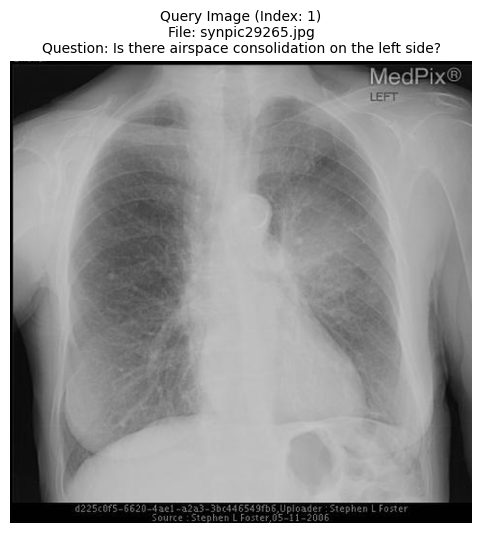


=== Hybrid RAG + KG Results ===
Query: Is there airspace consolidation on the left side?

Retrieved Contexts:
--- Context 1 ---
  Type: Hybrid
  Source Index: 1
  Image ID: r-rad_train_1
  Original Filename: <PIL.Image.Image image mode=RGB size=512x512 at 0x7F0CF8D26B10>
  Question: Are the lungs normal appearing?
  Answer: no
  Solution: The provided chest x-ray shows some abnormalities indicating that the lungs are not normal appearing. There is evidence of a density seen on the left side of the image, which corresponds to the right lung of the patient due to the orientation of the x-ray. This density suggests the presence of some pathological process, such as an infection, mass, or consolidation, which is not normal in a healthy lung. The normal appearance of the lung on an x-ray should show clear lung fields with well-defined vascular markings, and no unusual opacities or masses should be present.



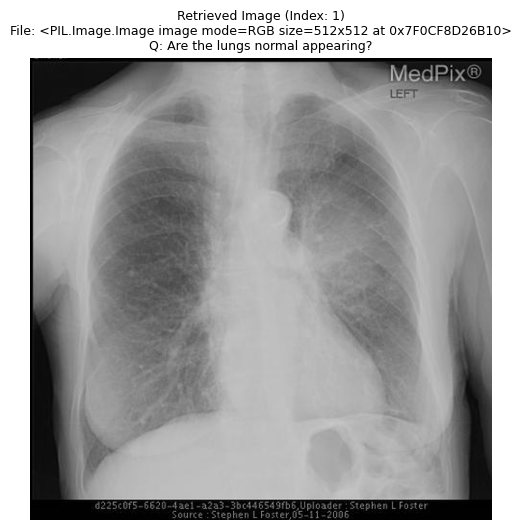

--- Context 2 ---
  Type: Hybrid
  Source Index: 2
  Image ID: r-rad_train_2
  Original Filename: <PIL.Image.Image image mode=RGB size=512x512 at 0x7F0CF8CFBB10>
  Question: Is there evidence of a pneumothorax?
  Answer: no
  Solution: There is no visible evidence of a pneumothorax on the provided chest X-ray image, which is typically identified by an area of no lung markings representing air in the pleural space and can be accompanied by a visible thin line indicating the edge of the collapsed lung. The absence of these findings suggests that there is no pneumothorax present. Additionally, the lung fields appear to be fully expanded, and the lung markings extend to the edges of the pleural cavity without interruption.



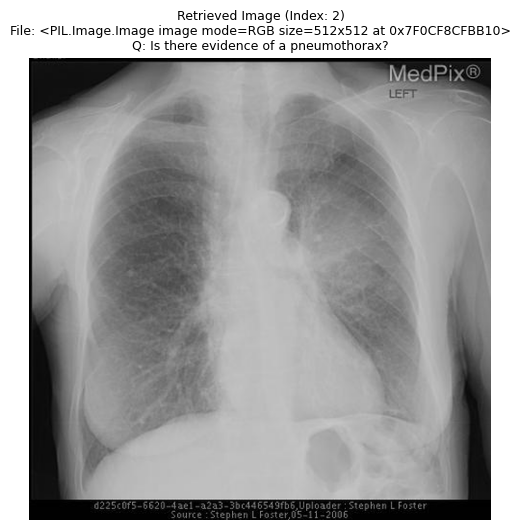

--- Context 3 ---
  Type: Hybrid
  Source Index: 3
  Image ID: r-rad_train_3
  Original Filename: <PIL.Image.Image image mode=RGB size=512x512 at 0x7F0CF8CF90D0>
  Question: Is this a MRI of the chest?
  Answer: no
  Solution: This image is not an MRI, but instead it is a radiograph, commonly known as an X-ray. The distinction can be noted by the presence of high-contrast images of bones and the clear outline of the lungs and heart, which are typical characteristics of X-ray images. MRI images, on the other hand, would have a different appearance with more detail of the soft tissues and less emphasis on the bones.



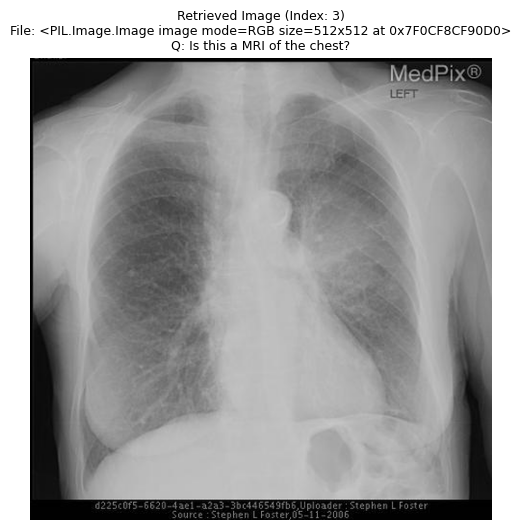

In [73]:
# --- Test the hybrid approach ---
query_test_index = 1 
if query_test_index >= len(df_test):
    print(f"Error: query_test_index {query_test_index} is out of bounds for df_test (size: {len(df_test)}).")
else:
    query_test_record = df_test.iloc[query_test_index]

    # --- Corrected Query Image Loading ---
    # Prioritize the pre-processed PIL image object
    query_image_data = query_test_record.get("image_processed", None) # Get PIL object or None
    query_text = query_test_record.get("question", "No question found")
    original_query_filename = query_test_record.get("image", "N/A") # Get original filename for reference

    print(f"--- Query Sample (Index: {query_test_index}, File: {original_query_filename}) ---")
    print(f"Question: {query_text}")
    print(f"Data type in 'image_processed' column: {type(query_image_data)}")

    query_image_pil = None
    if query_image_data is not None:
        query_image_pil = ensure_pil_image(query_image_data) # Validate/convert just in case

    if query_image_pil:
        print("Successfully obtained query PIL Image.")
        # Visualize the query image
        plt.figure(figsize=(6, 6))
        plt.imshow(query_image_pil)
        plt.title(f"Query Image (Index: {query_test_index})\nFile: {original_query_filename}\nQuestion: {query_text}", fontsize=10)
        plt.axis("off")
        plt.show()

        # Run hybrid retrieval
        try:
            # Pass the PIL image object directly
            result = hybrid_retrieval(query_image_pil, query_text, graph, k=3)
        except Exception as e:
            print(f"Error during hybrid retrieval: {e}")
            result = {"query": query_text, "contexts": [], "error": str(e)}
    else:
        # This case happens if image_processed was None or ensure_pil_image failed
        print(f"Error: Could not load or validate query image from 'image_processed' column for index {query_test_index}.")
        print("Skipping visualization and hybrid retrieval.")
        result = {"query": query_text, "contexts": [], "error": "Query image unavailable."}

    # --- Display Results ---
    print("\n=== Hybrid RAG + KG Results ===")
    print(f"Query: {result.get('query', 'N/A')}")
    if "error" in result:
        print(f"Retrieval Error: {result['error']}")

    print("\nRetrieved Contexts:")
    if not result.get('contexts'):
        print("No contexts were retrieved.")

    for i, ctx in enumerate(result.get('contexts', []), 1):
        print(f"--- Context {i} ---")
        print(f"  Type: {ctx.get('type', 'Unknown')}")
        print(f"  Source Index: {ctx.get('index', 'N/A')}") # Display the index in df_train
        print(f"  Image ID: {ctx.get('image_id', 'N/A')}")
        print(f"  Original Filename: {ctx.get('image_name', 'N/A')}")
        print(f"  Question: {ctx.get('question', 'N/A')}")
        print(f"  Answer: {ctx.get('answer', 'N/A')}")
        print(f"  Solution: {ctx.get('solution', 'N/A')}\n")

        # Visualize the retrieved training image using the index
        retrieved_index = ctx.get('index')
        if retrieved_index is not None:
            try:
                # Access the PIL image directly from df_train using the index
                training_image_pil = df_train.iloc[retrieved_index]["image_processed"]

                if training_image_pil and isinstance(training_image_pil, Image.Image):
                    plt.figure(figsize=(6, 6))
                    plt.imshow(training_image_pil)
                    plt.title(f"Retrieved Image (Index: {retrieved_index})\nFile: {ctx.get('image_name', 'N/A')}\nQ: {ctx['question']}", fontsize=9)
                    plt.axis("off")
                    plt.show()
                elif training_image_pil is None:
                    print(f"  (Skipping visualization: Preprocessed image is None for index {retrieved_index})")
                else:
                    print(f"  (Skipping visualization: Invalid image data type {type(training_image_pil)} for index {retrieved_index})")

            except IndexError:
                 print(f"  (Error visualizing: Index {retrieved_index} out of bounds for df_train)")
            except Exception as e:
                 print(f"  (Error visualizing image for index {retrieved_index}: {e})")
        else:
            print("  (Skipping visualization: No source index provided)")

In [74]:
# Test the hybrid approach
test_sample = df_test.iloc[0]
test_image = test_sample["image_processed"]
test_question = test_sample["question"]
result = hybrid_retrieval(test_image, test_question, graph)

print("\n=== Hybrid RAG + KG Results ===")
print(f"Query: {result['query']}")
print("\nRetrieved Contexts:")
for i, ctx in enumerate(result['contexts'], 1):
    print(f"Context {i}:")
    print(f"  Image ID: {ctx['image_id']}")
    print(f"  Question: {ctx['question']}")
    print(f"  Answer: {ctx['answer']}")
    print(f"  Solution: {ctx['solution']}\n")
# print(result['response'])


=== Hybrid RAG + KG Results ===
Query: Is there evidence of an aortic aneurysm?

Retrieved Contexts:
Context 1:
  Image ID: r-rad_train_7
  Question: Is there a pneumothorax?
  Answer: no
  Solution: The diagnosis of pneumothorax involves identifying an abnormal collection of air in the pleural space between the lung and chest wall, which can cause the lung to collapse. On a chest radiograph like the one provided, a pneumothorax is typically indicated by a visible rim of air between the chest wall and the lung edge that is devoid of lung markings. In this image, the lungs appear fully expanded with lung markings visible all the way to the chest wall, indicating no evidence of this rim of air. Therefore, the absence of such findings suggests that there is no pneumothorax present.

Context 2:
  Image ID: r-rad_train_14
  Question: Is this an anterior-posterior image
  Answer: no
  Solution: The image is identified as a posteroanterior (PA) chest X-ray, not an anterior-posterior (AP) ima